# Import libraries & data & define variables

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
#from pulp import *

In [4]:
df = pd.read_csv("c:/Users/Mark/Google Drive/Projects - sites/budget-tool/uploads/LV - CPA/LV-trademark-cpa-jan-aug.csv", header=0)

In [5]:
#remove commas and turn strings into floats.
df = df.replace({'\$': '', ',': '', '%': '', '--': ''}, regex=True) #remove commas, percentage and dollars from values
#df = df.convert_objects(convert_numeric=True)
df.Cost = df.Cost.astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 3 columns):
Day            242 non-null object
Cost           242 non-null float64
Conversions    242 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ KB


In [7]:
df.head()

,Day,Cost,Conversions
0,2/08/2017,941.58,16
1,16/05/2017,476.66,13
2,27/06/2017,539.50,12
3,26/07/2017,1076.36,12
4,11/07/2017,980.62,12


In [8]:
#define variables
X = df['Cost'].values
y = df['Conversions'].values

In [9]:
# defining a helper function to plot a scatterplot of the training samples and regression line (for the regression tree plot)
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

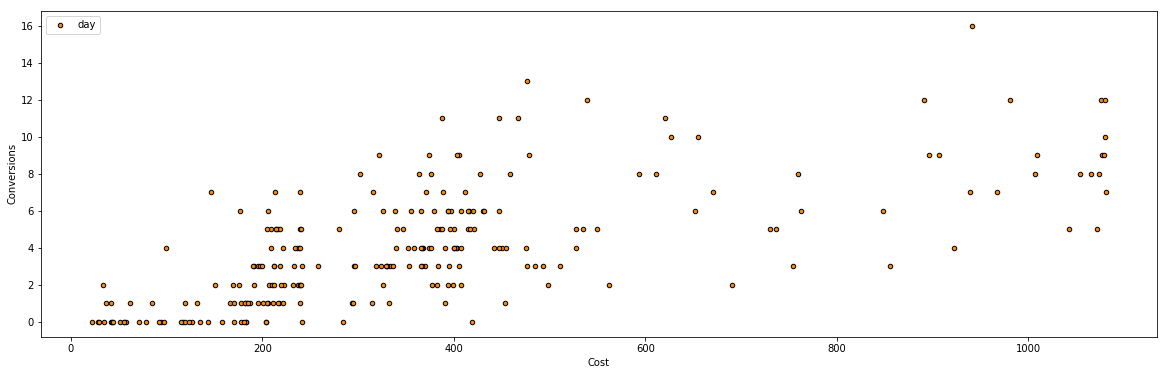

In [10]:
#plot a scatter of the points
df.plot(x='Cost', y='Conversions', figsize=(20,6), kind='scatter', s=20, edgecolor="black", c="darkorange", label='day')
plt.legend(loc='upper left')

In [11]:
#X needs to be reshaped for the algo
X = X.reshape(-1, 1)
X

array([[ 941.58],
       [ 476.66],
       [ 539.5 ],
       [1076.36],
       [ 980.62],
       [ 891.35],
       [1079.98],
       [ 388.15],
       [ 467.53],
       [ 620.55],
       [ 446.84],
       [1080.  ],
       [ 627.06],
       [ 655.18],
       [1077.2 ],
       [ 478.83],
       [ 321.81],
       [ 374.01],
       [1008.8 ],
       [ 907.12],
       [ 405.92],
       [ 896.66],
       [1079.76],
       [ 403.14],
       [1007.68],
       [ 593.26],
       [1053.97],
       [1073.77],
       [ 759.45],
       [ 375.87],
       [ 363.57],
       [ 301.84],
       [ 427.67],
       [1065.92],
       [ 611.6 ],
       [ 458.88],
       [ 370.76],
       [ 239.85],
       [ 411.59],
       [1081.57],
       [ 315.87],
       [ 938.85],
       [ 388.94],
       [ 967.17],
       [ 146.64],
       [ 670.3 ],
       [ 212.78],
       [ 446.76],
       [ 325.66],
       [ 762.24],
       [ 652.31],
       [ 419.77],
       [ 415.85],
       [ 379.58],
       [ 848.88],
       [ 4

# Decision Tree depth 3

In [23]:
#running a decision tree regressor - max depth 3
tree1 = DecisionTreeRegressor(max_depth=3) 
treefit = tree1.fit(X, y)
sort_idx = X.flatten().argsort()
treefit

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [24]:
#predictions
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis] #need to rearrange/scale teh axis for plotting the trendline

tree_predict = tree1.predict(X_fit)
tree_predict

array([0.38709677, 0.38709677, 0.38709677, ..., 8.7       , 8.7       ,
       8.7       ])

In [25]:
#rsquared score from decision tree regressor
regression_tree_r2 = r2_score(y, treefit.predict(X))
print(r2_score(y, treefit.predict(X)))
#print(treefit.score(X, y))

0.5397906554158618


In [26]:
#RMSE for decision tree
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, treefit.predict(X))
rmsqe_DT = np.sqrt(mse)
print("RMSQE: ", rmsqe_DT)

RMSQE:  2.1514380525628813


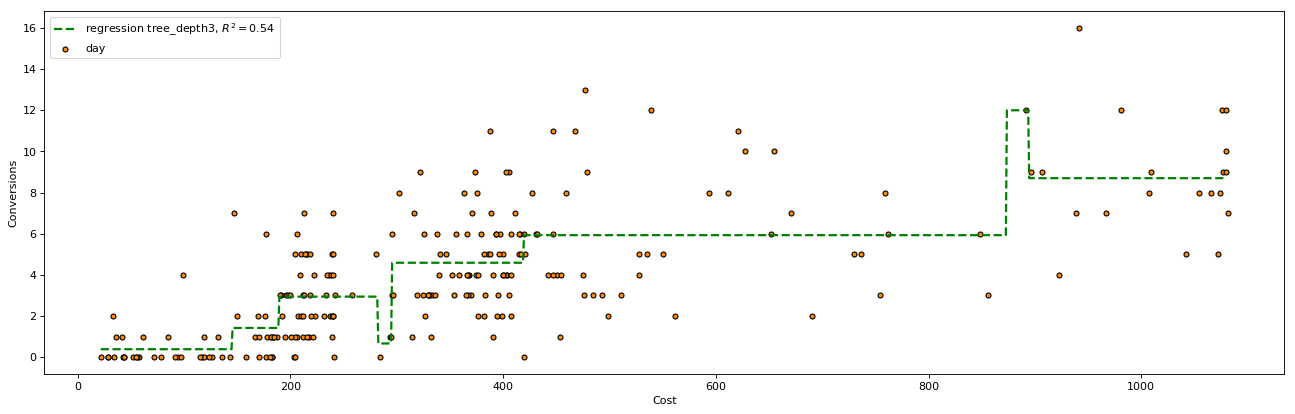

In [30]:
plt.figure(figsize=(20, 6), dpi=80)

plt.scatter(X,y, s=20, edgecolor="black", c="darkorange", label='day')
plt.plot(X_fit, tree_predict, label='regression tree_depth3, $R^2=%.2f$' % regression_tree_r2, color='green', lw=2, linestyle='--')   

plt.xlabel('Cost')
plt.ylabel('Conversions')
plt.legend(loc='upper left')
plt.show()

# Decision Tree Depth 10

0.9123045377702022
RMSQE:  0.9391602226368445


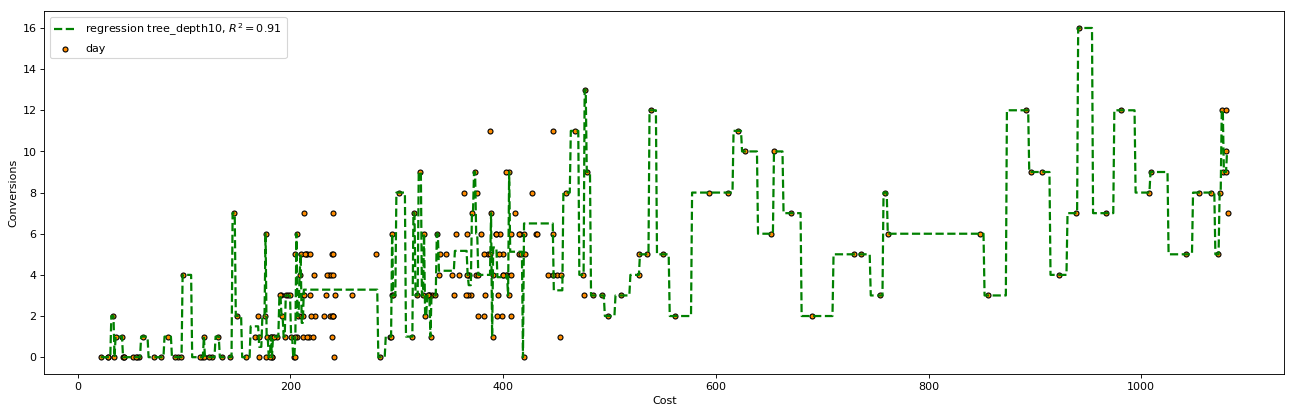

In [192]:
#as above but with a depth of 10

tree = DecisionTreeRegressor(max_depth=10) 
treefit = tree.fit(X, y)
sort_idx = X.flatten().argsort()
treefit

#predictions
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis] #need to rearrange/scale teh axis for plotting the trendline

tree_predict = tree.predict(X_fit)
tree_predict

#rsquared score from decision tree regressor
regression_tree_r2 = r2_score(y, treefit.predict(X))
print(r2_score(y, treefit.predict(X)))
#print(treefit.score(X, y))

#RMSE for decision tree
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, treefit.predict(X))
rmsqe_DT = np.sqrt(mse)
print("RMSQE: ", rmsqe_DT)

#plot
plt.figure(figsize=(20, 6), dpi=80)

plt.scatter(X,y, s=20, edgecolor="black", c="darkorange", label='day')
plt.plot(X_fit, tree_predict, label='regression tree_depth10, $R^2=%.2f$' % regression_tree_r2, color='green', lw=2, linestyle='--')   

plt.xlabel('Cost')
plt.ylabel('Conversions')
plt.legend(loc='upper left')
plt.show()


# Random Forest

In [61]:
#random forest  (known as regression forest)
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression
#X, y = make_regression(n_features=1, n_informative=2, random_state=0, shuffle=False)
rf = RandomForestRegressor (n_estimators=20, min_samples_split=2)
regr_forest_fit = rf.fit(X, y)
#print(regr_forest_fit.predict(400))  #test the prediction at a cost of X

In [62]:
regression_forest_r2 = r2_score(y, regr_forest_fit.predict(X)) #creating a variable for r2 for the graph with all the regression lines
print("r2_score for regression forest: ",r2_score(y, regr_forest_fit.predict(X))) 

r2_score for regression forest:  0.8854829939017765


In [63]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, regr_forest_fit.predict(X))
rmsqe_RF = np.sqrt(mse)
print("RMSQE RF: ", rmsqe_RF)

RMSQE RF:  1.0732134876540849


In [64]:
rf_predict = rf.predict(X_fit)
rf_predict

array([ 0.  ,  0.  ,  0.  , ...,  9.2 ,  9.2 , 10.45])

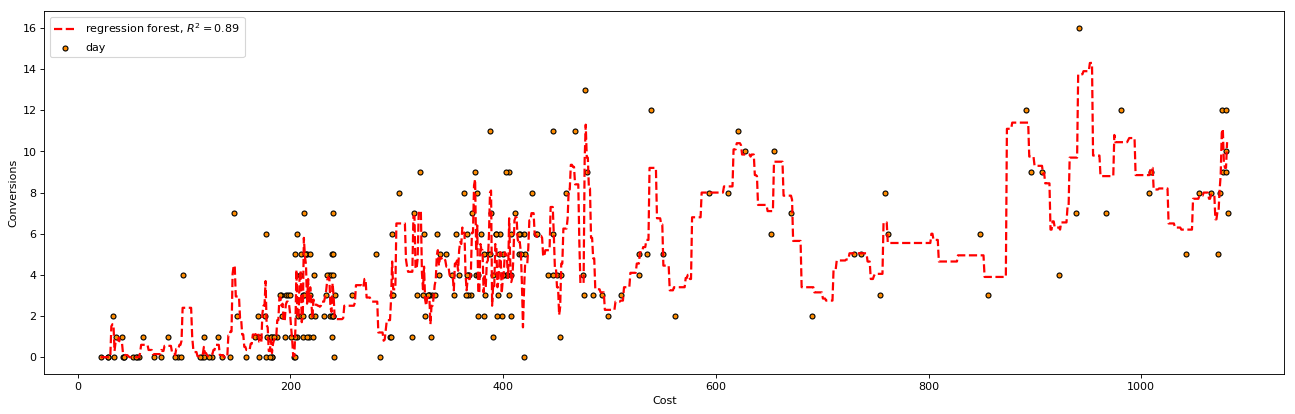

In [65]:
plt.figure(figsize=(20, 6), dpi=80)

plt.scatter(X,y, s=20, edgecolor="black", c="darkorange", label='day')
plt.plot(X_fit, rf_predict, label='regression forest, $R^2=%.2f$' % regression_forest_r2, color='red', lw=2, linestyle='--')   

plt.xlabel('Cost')
plt.ylabel('Conversions')
plt.legend(loc='upper left')
plt.show()
#note this is tree depth of 3 at the moment, can also show that happens with changing depth.

# Other Models

In [138]:
#non-linear regression code below common to all non-linear lines
regr = LinearRegression()
#fit features
#X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

In [141]:
#linear regression
regr = LinearRegression()
linr = regr.fit(X,y)
y_lin_fit = linr.predict(X_fit) #this is only to fit it on the graph with the others
r2_linear = r2_score(y, linr.predict(X))
print("r2 for linear regression: ", r2_linear)
#print(linr.predict(0)) #predict outcomes 'y' for different values of x
print(regr.coef_) #get the coefficient of x, ie y = mx + b
print(regr.intercept_)

r2 for linear regression:  0.4606848942576989
[0.00847522]
0.8523699759320347


In [142]:
#RMSE
mse = mean_squared_error(y, linr.predict(X))
rmsqe_LR = np.sqrt(mse)
print("RMSQE LR: ", rmsqe_LR)

RMSQE LR:  2.329015729641013


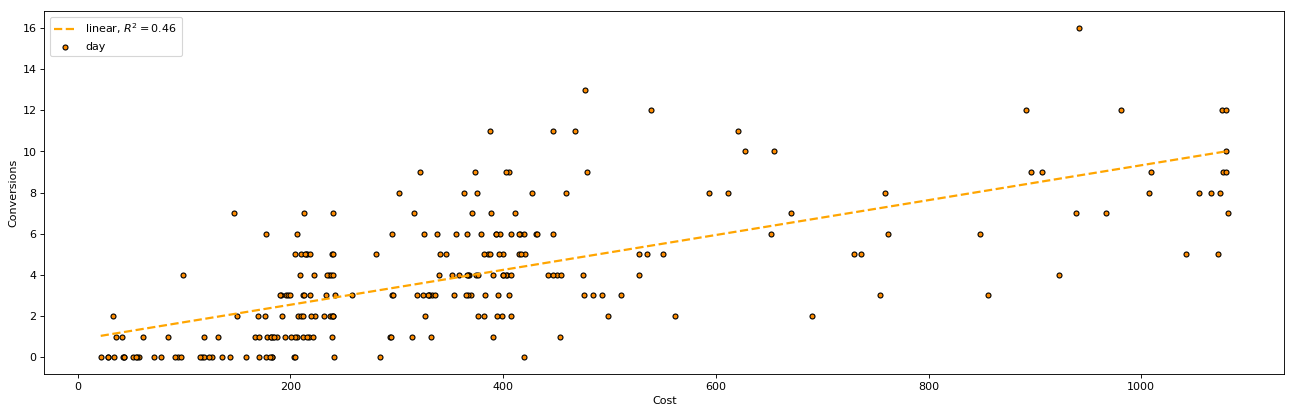

In [144]:
plt.figure(figsize=(20, 6), dpi=80)

plt.scatter(X,y, s=20, edgecolor="black", c="darkorange", label='day')
plt.plot(X_fit, y_lin_fit, label='linear, $R^2=%.2f$' % r2_linear, color='orange', lw=2, linestyle='--')   

plt.xlabel('Cost')
plt.ylabel('Conversions')
plt.legend(loc='upper left')
plt.show()
#note this is tree depth of 3 at the moment, can also show that happens with changing depth.

In [146]:
#non-linear regression - quadratic
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
print("r2 for quadratic: ", quadratic_r2)

#RMSE
mse = mean_squared_error(y, regr.predict(X_quad))
rmsqe_QR = np.sqrt(mse)
print("RMSQE Quad: ", rmsqe_QR)

r2 for quadratic:  0.4981067655311906
RMSQE Quad:  2.2467606037360945


In [148]:
#non-linear regression - cubic
cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(X)
regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))
print("r2 for cubic: ", cubic_r2)

#RMSE
mse = mean_squared_error(y, regr.predict(X_cubic))
rmsqe_CB = np.sqrt(mse)
print("RMSQE Cubic: ", rmsqe_CB)

r2 for cubic:  0.49963636209869766
RMSQE Cubic:  2.2433343175374887


# All Models

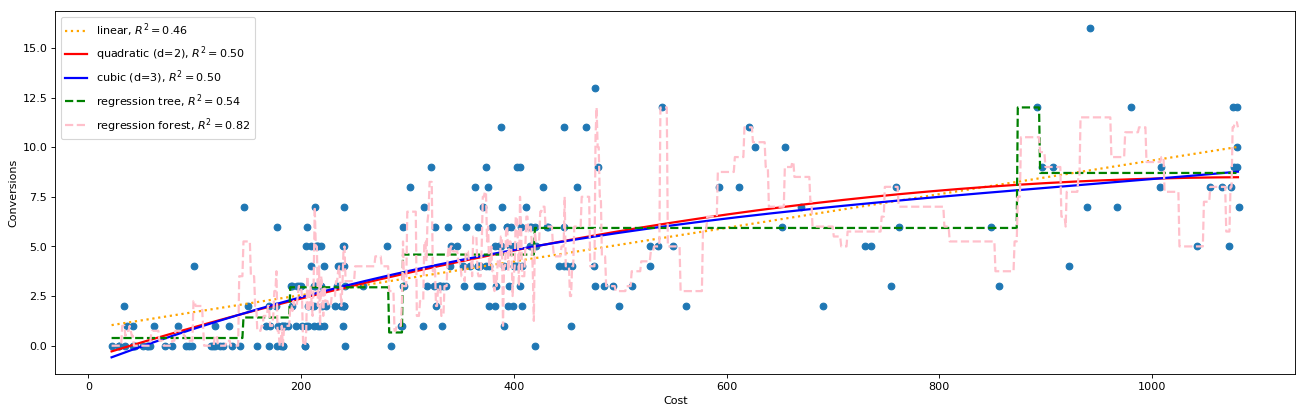

In [22]:
#plotting all the regression models against each other with r2 values

y_regressiontree_fit = tree.predict(X_fit) #preparing the regression tree data for the below plot.
y_regressionforest_fit = regr_forest_fit.predict(X_fit) #preparing the regression FOREST data for the below plot.

plt.figure(figsize=(20, 6), dpi=80)
plt.scatter(X,y)

plt.plot(X_fit, y_lin_fit, label='linear, $R^2=%.2f$' % r2_linear, color='orange', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3), $R^2=%.2f$' % cubic_r2, color='blue', lw=2, linestyle='-')
plt.plot(X_fit, y_regressiontree_fit, label='regression tree, $R^2=%.2f$' % regression_tree_r2, color='green', lw=2, linestyle='--')
plt.plot(X_fit, y_regressionforest_fit, label='regression forest, $R^2=%.2f$' % regression_forest_r2, color='pink', lw=2, linestyle='--')

plt.xlabel('Cost')
plt.ylabel('Conversions')
plt.legend(loc='upper left')
plt.show()